In [ ]:
# Veri işleme ve temel analiz
import numpy as np               # Sayısal işlemler ve matematiksel hesaplamalar için kullanılır.
import pandas as pd              # Veri yükleme, analiz ve veri çerçeveleri ile çalışmak için kullanılır.

# Görselleştirme kütüphaneleri
import matplotlib.pyplot as plt  # Veri görselleştirme ve grafik çizimleri için kullanılan temel kütüphanelerden biridir.
import seaborn as sns            # İleri düzey veri görselleştirme, özellikle ısı haritaları, dağılım grafikleri gibi analizler için kullanılır.
import plotly.express as px      # Etkileşimli ve görsel açıdan zengin grafikler oluşturmak için kullanılır.

# İstatistiksel analiz
import scipy.stats as stats      # İstatistiksel testler, dağılım analizleri ve hipotez testleri için kullanılır.

# Scikit-Learn: Model seçimi, çapraz doğrulama ve veri ön işleme
from sklearn.model_selection import train_test_split    # Veri setini eğitim ve test olarak bölmek için kullanılır.
from sklearn.preprocessing import StandardScaler        # Veriyi ölçeklendirmek, özellikle makine öğrenimi algoritmalarının performansını artırmak için kullanılır.

# Makine öğrenimi algoritmaları
import lightgbm as lgb                                                              # LightGBM, hızlı ve verimli bir gradient boosting algoritmasıdır.
import xgboost as xgb                                                               # XGBoost, popüler ve yüksek performanslı bir gradient boosting algoritmasıdır.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier     # Random Forest ve Gradient Boosting sınıflandırıcılar.
from sklearn.linear_model import LogisticRegression                                 # Lojistik regresyon modeli.
from sklearn.tree import DecisionTreeClassifier                                     # Karar ağacı sınıflandırıcı.
from sklearn.neighbors import KNeighborsClassifier                                  # K-En Yakın Komşu (KNN) sınıflandırıcı.
from sklearn.svm import SVC                                                         # Destek Vektör Makinesi sınıflandırıcı.

# Model değerlendirme metrikleri
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef   # Model değerlendirme metrikleri.

# Keras - Derin öğrenme modelleri
from tensorflow.keras.models import Sequential        # Derin öğrenme modelleri oluşturmak için kullanılan Keras sınıfı.
from tensorflow.keras.layers import Dense, LSTM       # Yoğun katmanlar (Dense) ve Uzun Kısa Süreli Bellek (LSTM) katmanları.

# Uyarıların kapatılması
import warnings                                       # Uyarıları kapatmak ve çalışma ortamını temiz tutmak için kullanılır.
warnings.filterwarnings("ignore")                     # Uyarıları görmezden gelir.

# Zaman ölçümü ve model kaydetme
import time                                           # İşlem sürelerini ölçmek için kullanılır.

# Hiperparametre optimizasyonu
from sklearn.model_selection import GridSearchCV      # Hiperparametrelerin optimize edilmesi için kullanılır.

# Model performansı değerlendirme metrikleri
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, matthews_corrcoef  # Performans metrikleri.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay                                    # Karışıklık matrisi ve görselleştirilmesi.

In [2]:
df = pd.read_csv('C:\\Users\\alisa\\OneDrive\\Masaüstü\\2025 Dönem Projesi\\ai4i2020.csv')

In [3]:
df.head()

,UDI,Product ID,Tür,İşlem Sıcaklığı [C],Hava Sıcaklığı [C],Dönme Hızı [rpm],Tork [Nm],Alet Aşınması [dk],Makine Arızası,Takım Aşınma Arızası,Isı Dağılımı Arızası,Güç Kesintisi,Aşırı Gerilim Arızası,Rastgele Arızalar
0,1,M14860,M,35.45,24.95,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,35.55,25.05,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,35.35,24.95,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,35.45,25.05,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,35.55,25.05,1408,40.0,9,0,0,0,0,0,0


In [4]:
# Her bir Product ID'nin kaç kere tekrar ettiğini sayar
product_counts = df['Product ID'].value_counts()

# Sadece birden fazla kez tekrar edenleri filtreler
duplicate_products = product_counts[product_counts > 1]

# Sonuçları ekrana yazdırır
print("Aynı olan Product ID sayıları:")
print(duplicate_products)

# Kaç farklı Product ID'nin tekrar ettiğini görmek için
print(f"\nTekrar eden toplam Product ID sayısı: {len(duplicate_products)}")

Aynı olan Product ID sayıları:
Series([], Name: count, dtype: int64)

Tekrar eden toplam Product ID sayısı: 0


In [5]:
# Data Setinden sütun silme işlemi
df = df.drop(columns=['Product ID'], errors='ignore')

In [6]:
# Sütundaki Eksik Veri Kontrolü
df.isnull().sum()

UDI                      0
Tür                      0
İşlem Sıcaklığı [C]      0
Hava Sıcaklığı [C]       0
Dönme Hızı [rpm]         0
Tork [Nm]                0
Alet Aşınması [dk]       0
Makine Arızası           0
Takım Aşınma Arızası     0
Isı Dağılımı Arızası     0
Güç Kesintisi            0
Aşırı Gerilim Arızası    0
Rastgele Arızalar        0
dtype: int64

In [7]:
# Data Setindeki genel bilgiler
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UDI                    10000 non-null  int64  
 1   Tür                    10000 non-null  object 
 2   İşlem Sıcaklığı [C]    10000 non-null  float64
 3   Hava Sıcaklığı [C]     10000 non-null  float64
 4   Dönme Hızı [rpm]       10000 non-null  int64  
 5   Tork [Nm]              10000 non-null  float64
 6   Alet Aşınması [dk]     10000 non-null  int64  
 7   Makine Arızası         10000 non-null  int64  
 8   Takım Aşınma Arızası   10000 non-null  int64  
 9   Isı Dağılımı Arızası   10000 non-null  int64  
 10  Güç Kesintisi          10000 non-null  int64  
 11  Aşırı Gerilim Arızası  10000 non-null  int64  
 12  Rastgele Arızalar      10000 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1015.8+ KB


In [8]:
def check_duplicates(df):
    if df.duplicated().any():
        print("Tekrar eden satır(lar) var.")
    else:
        print("Tekrar eden satır bulunamadı.")

# Tekrarlayan satır kontrolü
check_duplicates(df)

Tekrar eden satır bulunamadı.


In [9]:
# Sadece belirtilen sütunları seçme
selected_columns = [
    "Hava Sıcaklığı [C]",
    "İşlem Sıcaklığı [C]",
    "Dönme Hızı [rpm]",
    "Tork [Nm]",
    "Alet Aşınması [dk]",
]

df_selected = df[selected_columns]

# Veriyi özetleme
df_summary = df_selected.describe().T

# Çeyrekten çeyreğe (Q3-Q1) fark kolonu ekleme
df_summary['Q3-Q1'] = df_summary['75%'] - df_summary['25%']

# Z-Score ve IQR analizine göre uç değer tespiti
outliers_z_score = {}
outliers_iqr = {}

for column in df_selected.columns:
    # Z-Skoru yöntemiyle uç değerleri belirleme
    z_scores = stats.zscore(df_selected[column].dropna())
    outliers_z_score[column] = (abs(z_scores) > 3).sum()  # Z-skoru 3'ten büyük olan gözlemler
    
    # IQR yöntemiyle uç değerleri belirleme
    Q1 = df_selected[column].quantile(0.25)
    Q3 = df_selected[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers_iqr[column] = ((df_selected[column] < (Q1 - 1.5 * IQR)) | (df_selected[column] > (Q3 + 1.5 * IQR))).sum()

# Sonuçları özet tabloya ekleme
df_summary['Outliers_Z_Score'] = df_summary.index.map(outliers_z_score)
df_summary['Outliers_IQR'] = df_summary.index.map(outliers_iqr)

# Özelleştirilmiş stil
styled_summary = df_summary.style \
    .bar(subset=['mean'], color=px.colors.qualitative.G10[2]) \
    .background_gradient(subset=['std'], cmap='Blues') \
    .background_gradient(subset=['50%'], cmap='BuGn') \
    .background_gradient(subset=['Q3-Q1'], cmap='YlOrBr') \
    .background_gradient(subset=['Outliers_Z_Score'], cmap='Reds') \
    .background_gradient(subset=['Outliers_IQR'], cmap='Purples')

styled_summary

,count,mean,std,min,25%,50%,75%,max,Q3-Q1,Outliers_Z_Score,Outliers_IQR
Hava Sıcaklığı [C],10000.000000,26.854930,2.000259,22.150000,25.150000,26.950000,28.350000,31.350000,3.200000,0,0
İşlem Sıcaklığı [C],10000.000000,36.855560,1.483734,32.550000,35.650000,36.950000,37.950000,40.650000,2.300000,0,0
Dönme Hızı [rpm],10000.000000,1538.776100,179.284096,1168.000000,1423.000000,1503.000000,1612.000000,2886.000000,189.000000,164,418
Tork [Nm],10000.000000,39.986910,9.968934,3.800000,33.200000,40.100000,46.800000,76.600000,13.600000,25,69
Alet Aşınması [dk],10000.000000,107.951000,63.654147,0.000000,53.000000,108.000000,162.000000,253.000000,109.000000,0,0


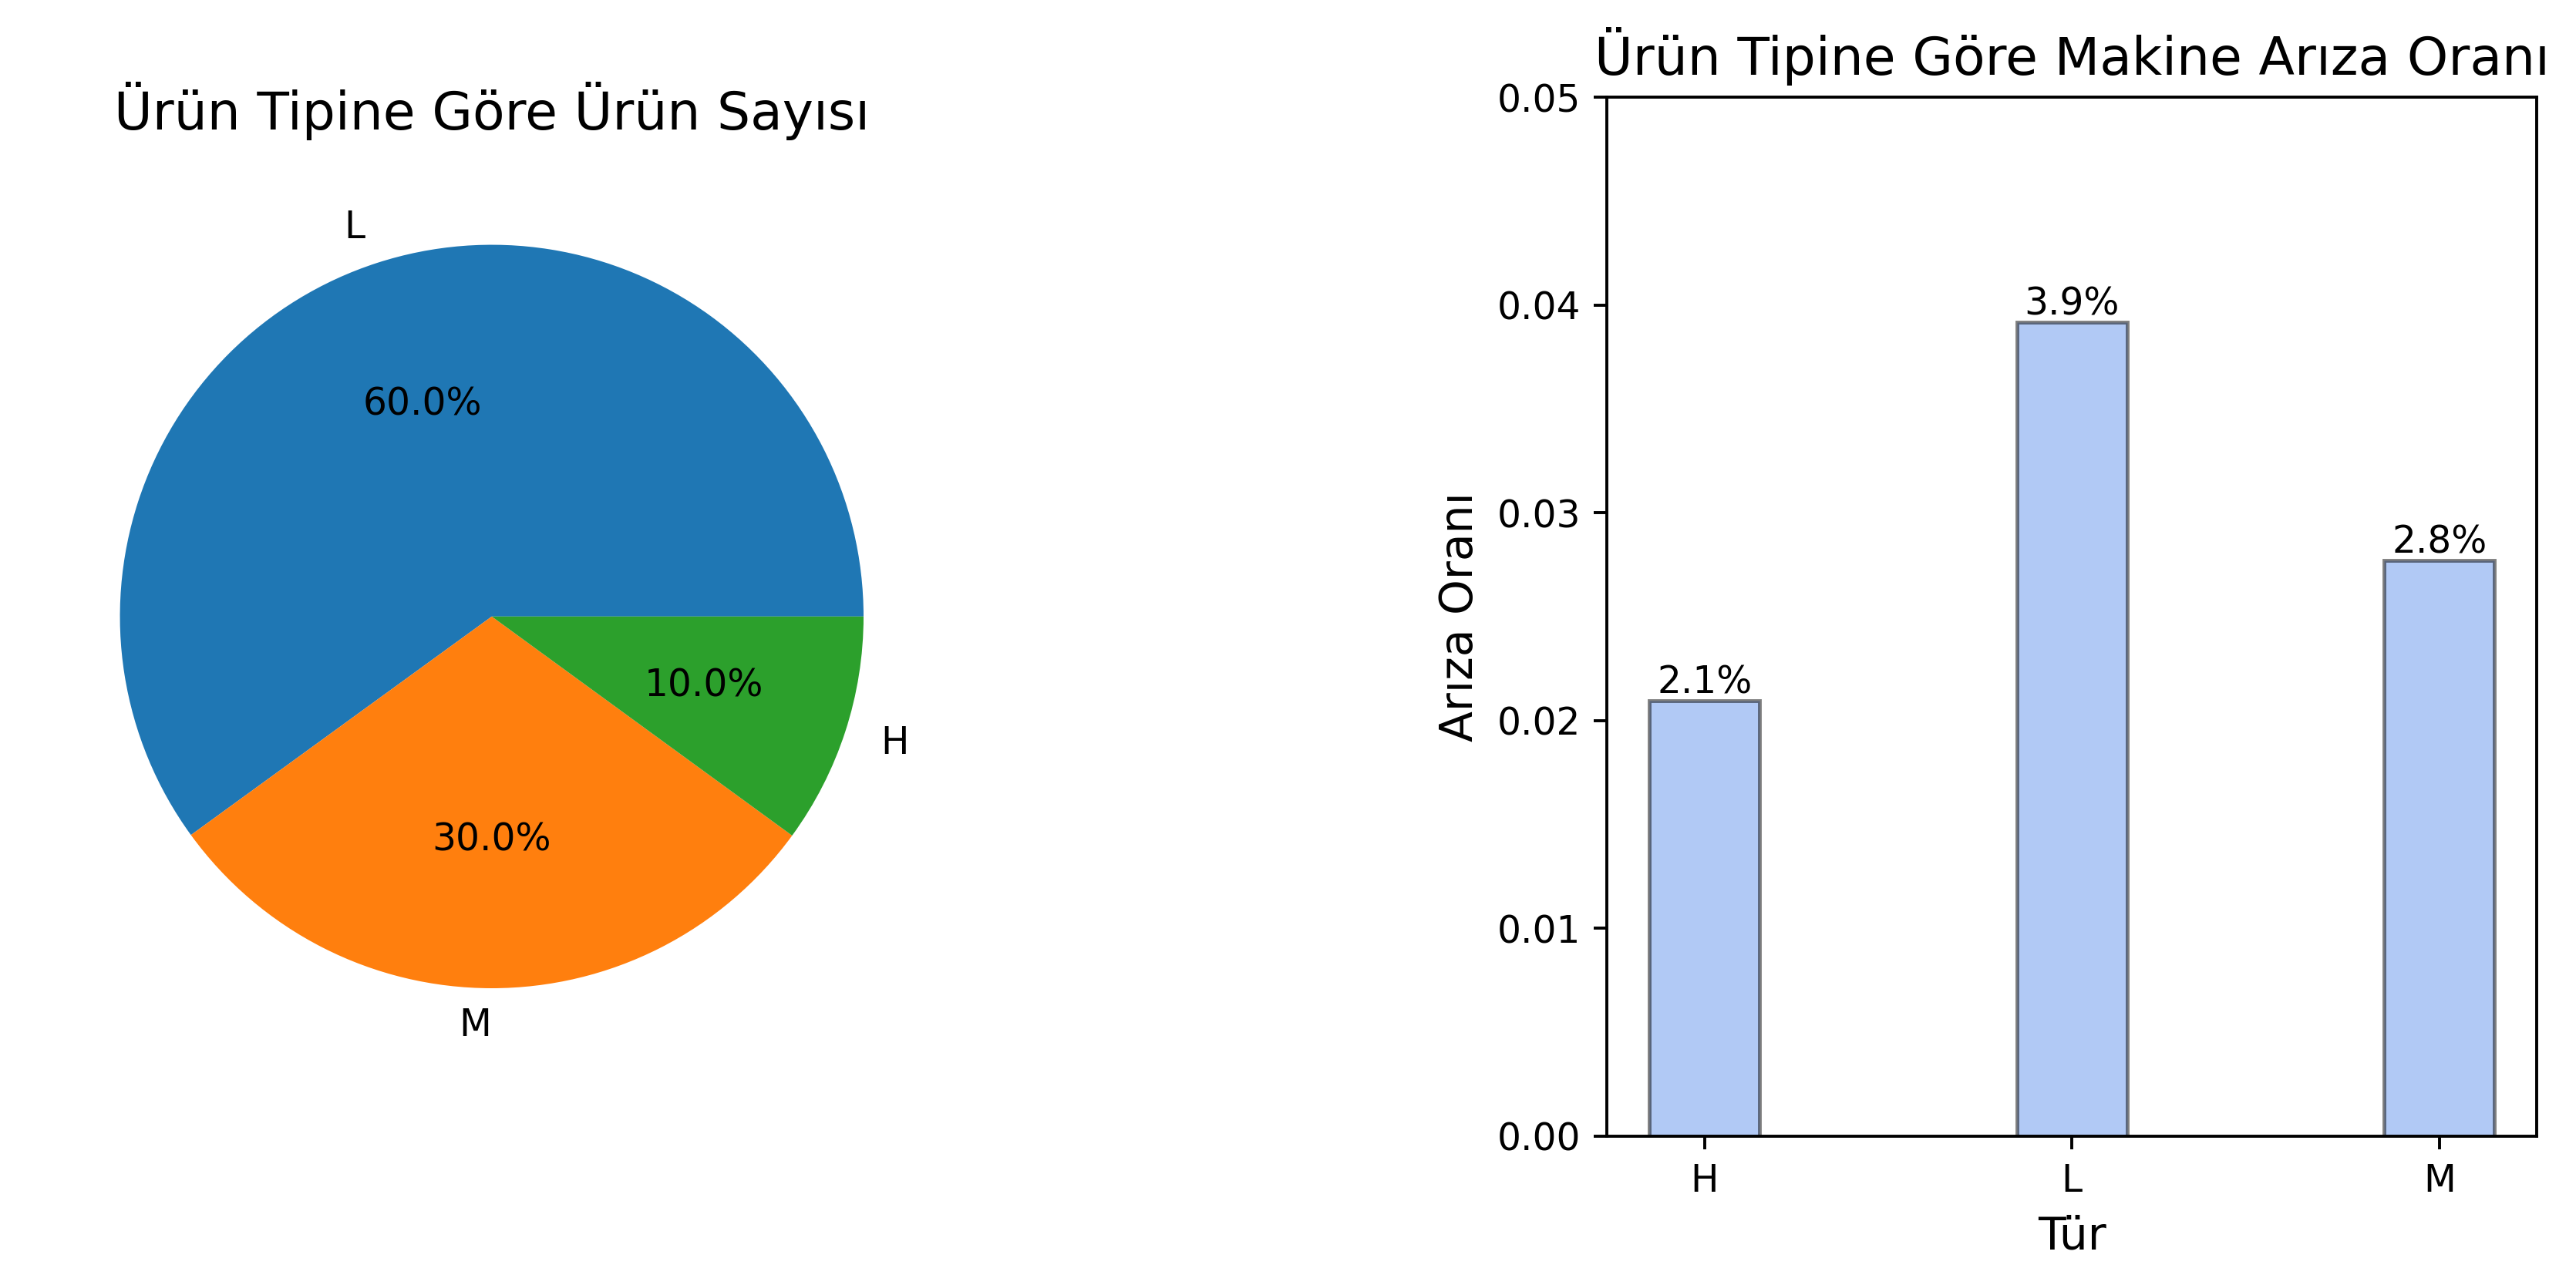

In [10]:
fig = plt.figure(figsize=(12, 5), dpi=350)

type_count = df['Tür'].value_counts()

ax1 = plt.subplot(1, 2, 1)
ax1.pie(type_count.values, labels=type_count.index, autopct='%1.1f%%')
ax1.set_title("Ürün Tipine Göre Ürün Sayısı", fontsize=14)

ax2 = plt.subplot(1, 2, 2)
type_failure_rate = df.groupby('Tür')['Makine Arızası'].mean().reset_index()

bars = ax2.bar(type_failure_rate['Tür'], type_failure_rate['Makine Arızası'], 
               alpha=0.5, width=0.3, color='cornflowerblue', edgecolor='black')

ax2.set_title("Ürün Tipine Göre Makine Arıza Oranı", fontsize=14)
ax2.set_xlabel("Tür", fontsize=12)
ax2.set_ylabel("Arıza Oranı", fontsize=12)
ax2.set_ylim([0, 0.05])

for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'{height*100:.1f}%', (bar.get_x() + bar.get_width() / 2., height),
                 ha='center', va='bottom', fontsize=10, color='black')

plt.subplots_adjust(wspace=0.7)
plt.show()

In [11]:
# Hatalar ile anahtar parametreler arasındaki korelasyonları hesaplama
correlation_matrix = df[['Takım Aşınma Arızası', 'Isı Dağılımı Arızası ', 'Güç Kesintisi', 'Aşırı Gerilim Arızası', 'Rastgele Arızalar', 
                           'İşlem Sıcaklığı [C]', 'Hava Sıcaklığı [C]', 
                           'Dönme Hızı [rpm]', 'Tork [Nm]', 'Alet Aşınması [dk]']].corr()

# Daha net bir analiz için yalnızca hata ile ilgili korelasyonları çıkarma
failure_correlation = correlation_matrix.loc[['Takım Aşınma Arızası', 'Isı Dağılımı Arızası ', 'Güç Kesintisi', 'Aşırı Gerilim Arızası', 'Rastgele Arızalar'],
                                             ['İşlem Sıcaklığı [C]', 'Hava Sıcaklığı [C]', 
                                              'Dönme Hızı [rpm]', 'Tork [Nm]', 'Alet Aşınması [dk]']]
failure_correlation

,İşlem Sıcaklığı [C],Hava Sıcaklığı [C],Dönme Hızı [rpm],Tork [Nm],Alet Aşınması [dk]
Takım Aşınma Arızası,0.007315,0.009955,0.010389,-0.014662,0.115792
Isı Dağılımı Arızası,0.056933,0.137831,-0.121241,0.142610,-0.001287
Güç Kesintisi,-0.003355,0.003470,0.123018,0.083781,-0.009334
Aşırı Gerilim Arızası,0.004554,0.001988,-0.104575,0.183465,0.155894
Rastgele Arızalar,0.022279,0.017688,-0.013088,0.016136,0.011326


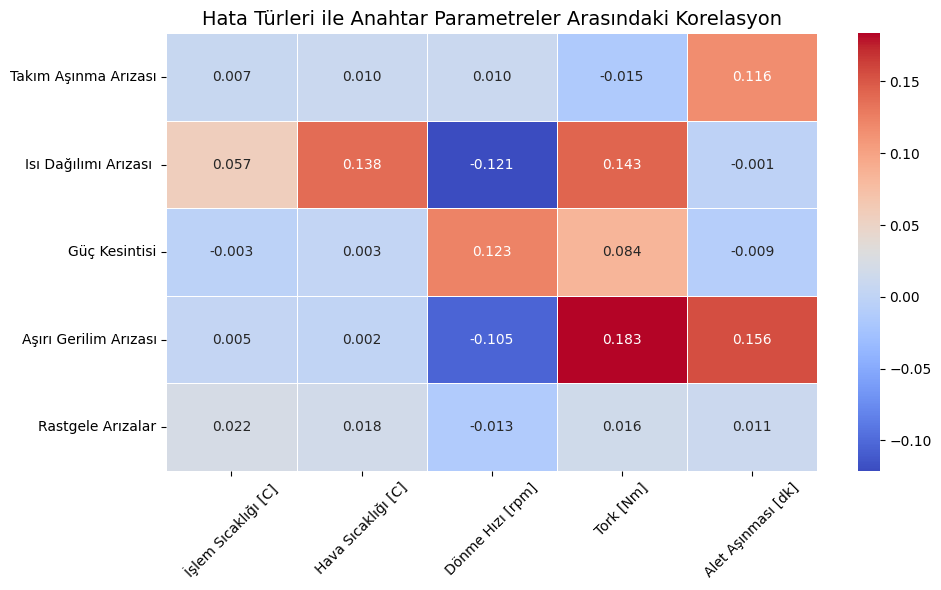

In [12]:
# Isı haritasını oluşturma
plt.figure(figsize=(10, 6))
sns.heatmap(
    failure_correlation,
    annot=True,
    fmt=".3f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Hata Türleri ile Anahtar Parametreler Arasındaki Korelasyon", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Arıza Türleri İşlemleri

### Takım Aşınma Arızası (TAA)

In [13]:
# Alet aşınmasının 200 ile 240 dakika arasında olması durumunda arıza meydana gelir
df['TAA'] = df['Alet Aşınması [dk]'].apply(lambda x: 1 if 200 <= x <= 240 else 0)

In [14]:
df[(df['Alet Aşınması [dk]'] >= 200) & (df['Alet Aşınması [dk]'] <= 240)].head()

,UDI,Tür,İşlem Sıcaklığı [C],Hava Sıcaklığı [C],Dönme Hızı [rpm],Tork [Nm],Alet Aşınması [dk],Makine Arızası,Takım Aşınma Arızası,Isı Dağılımı Arızası,Güç Kesintisi,Aşırı Gerilim Arızası,Rastgele Arızalar,TAA
73,74,L,35.95,25.85,1592,35.0,200,0,0,0,0,0,0,1
74,75,L,35.85,25.75,1601,32.3,202,0,0,0,0,0,0,1
75,76,L,35.75,25.65,1379,46.7,204,0,0,0,0,0,0,1
76,77,L,35.75,25.65,1461,47.9,206,0,0,0,0,0,0,1
77,78,L,35.75,25.65,1455,41.3,208,1,1,0,0,0,0,1


In [15]:
taa_1_sayisi = df['TAA'].value_counts()[1]
print(f"TAA sütununda {taa_1_sayisi} adet 1 değeri var.")

TAA sütununda 790 adet 1 değeri var.


### Isı Dağılımı Arızası Başarısızlığı (IDA)

In [16]:
# Hava sıcaklığı ile işlem sıcaklığı arasındaki fark 8.6°C'nın altında ve dönüş hızı 1380 rpm'nin altındaysa arıza meydana gelir
df['IDA'] = df.apply(lambda row: 1 if (row['İşlem Sıcaklığı [C]'] - row['Hava Sıcaklığı [C]'] < 8.6) and (row['Dönme Hızı [rpm]'] < 1380) else 0, axis=1)

In [17]:
df[(df['İşlem Sıcaklığı [C]'] - df['Hava Sıcaklığı [C]'] < 8.6) & (df['Dönme Hızı [rpm]'] < 1380)].head()

,UDI,Tür,İşlem Sıcaklığı [C],Hava Sıcaklığı [C],Dönme Hızı [rpm],Tork [Nm],Alet Aşınması [dk],Makine Arızası,Takım Aşınma Arızası,Isı Dağılımı Arızası,Güç Kesintisi,Aşırı Gerilim Arızası,Rastgele Arızalar,TAA,IDA
3236,3237,M,36.25,27.65,1342,62.4,113,1,0,1,0,0,0,0,1
3760,3761,L,37.75,29.15,1377,46.8,166,1,0,1,0,0,0,0,1
3787,3788,L,37.65,29.15,1377,47.3,22,1,0,1,0,0,0,0,1
3793,3794,L,37.75,29.15,1379,49.3,34,1,0,1,0,0,0,0,1
3806,3807,M,37.75,29.15,1360,44.0,67,1,0,1,0,0,0,0,1


In [18]:
ıda_1_sayisi = df['IDA'].value_counts()[1]
print(f"IDA sütununda {ıda_1_sayisi} adet 1 değeri var.")

IDA sütununda 115 adet 1 değeri var.


### Güç Kesintisi (GK)

In [19]:
# Güç, 3500 W'nin altında veya 9000 W'nin üzerinde olursa arıza meydana gelir.
# Gücü hesaplamak için tork ve dönüş hızı değerlerini kullanıyoruz.
# Güç (W) = Tork (Nm) * Dönüş Hızı (rpm) * (2 * pi / 60)
df["GK"] = df.apply(
    lambda row: 1 if (row["Tork [Nm]"] * row["Dönme Hızı [rpm]"] * 2 * np.pi / 60 < 3500)
                  or (row["Tork [Nm]"] * row["Dönme Hızı [rpm]"] * 2 * np.pi / 60 > 9000) else 0,
    axis=1
)

In [20]:
df['Güç'] = df['Tork [Nm]'] * df['Dönme Hızı [rpm]'] * (2 * np.pi / 60)
df[(df['Güç'] < 3500) | (df['Güç'] > 9000)].head()

,UDI,Tür,İşlem Sıcaklığı [C],Hava Sıcaklığı [C],Dönme Hızı [rpm],Tork [Nm],Alet Aşınması [dk],Makine Arızası,Takım Aşınma Arızası,Isı Dağılımı Arızası,Güç Kesintisi,Aşırı Gerilim Arızası,Rastgele Arızalar,TAA,IDA,GK,Güç
50,51,L,35.95,25.75,2861,4.6,143,1,0,0,1,0,0,0,0,1,1378.174809
69,70,L,35.85,25.75,1410,65.7,191,1,0,0,1,1,0,0,0,1,9700.923955
168,169,L,35.15,25.25,1433,62.3,20,1,0,0,1,0,0,0,0,1,9348.950386
194,195,M,35.35,25.05,2678,10.7,86,1,0,0,1,0,0,0,0,1,3000.702695
207,208,M,35.55,25.25,1421,60.7,119,1,0,0,1,0,0,0,0,1,9032.571062


In [21]:
gk_1_sayisi = df['GK'].value_counts()[1]
print(f"GK sütununda {gk_1_sayisi} adet 1 değeri var.")

GK sütununda 95 adet 1 değeri var.


### Aşırı Zorlanma Arızası (AZA)

In [22]:
# Alet aşınması ve tork çarpımı, L için 11.000, M için 12.000, H için 13.000 minNm değerini aşarsa arıza meydana gelir.
def check_osf_failure(row):
    threshold = 11000 if row["Tür"] == "L" else 12000 if row["Tür"] == "M" else 13000
    return 1 if row["Alet Aşınması [dk]"] * row["Tork [Nm]"] > threshold else 0

df["AZA"] = df.apply(check_osf_failure, axis=1)
df[df['AZA'] == True].head()

,UDI,Tür,İşlem Sıcaklığı [C],Hava Sıcaklığı [C],Dönme Hızı [rpm],Tork [Nm],Alet Aşınması [dk],Makine Arızası,Takım Aşınma Arızası,Isı Dağılımı Arızası,Güç Kesintisi,Aşırı Gerilim Arızası,Rastgele Arızalar,TAA,IDA,GK,Güç,AZA
69,70,L,35.85,25.75,1410,65.7,191,1,0,0,1,1,0,0,0,1,9700.923955,1
160,161,L,35.05,25.25,1282,60.7,216,1,0,0,0,1,0,1,0,0,8149.019072,1
161,162,L,34.95,25.15,1412,52.3,218,1,0,0,0,1,0,1,0,0,7733.302588,1
242,243,L,35.05,24.85,1348,58.8,202,1,0,0,0,1,0,1,0,0,8300.339118,1
248,249,L,35.15,24.85,1362,56.8,216,1,0,0,0,1,0,1,0,0,8101.287808,1


In [23]:
aza_1_sayisi = df['AZA'].value_counts()[1]
print(f"AZA sütununda {aza_1_sayisi} adet 1 değeri var.")

AZA sütununda 98 adet 1 değeri var.


### Rastgele Arızalar (RA)

In [24]:
# Her işlemde %0.1 oranında rastgele bir arıza ihtimali bulunur.
# Bu nedenle, %0.1 ihtimalle RNF arızasını rastgele olarak uyguluyoruz.
df['RA'] = np.random.choice([1, 0], size=len(df), p=[0.001, 0.999])

In [25]:
# Tüm arıza durumlarını içeren "Makine Arızası" sütunu oluşturma
# Eğer herhangi bir arıza durumu oluşmuşsa 'Machine Failure' sütunu 1 olur
df['Makine Arızası'] = df[['TAA', 'IDA', 'GK', 'AZA', 'RA']].max(axis=1)
df[['TAA', 'IDA', 'GK', 'AZA', 'RA', 'Makine Arızası']].head()

,TAA,IDA,GK,AZA,RA,Makine Arızası
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [26]:
ra_1_sayisi = df['RA'].value_counts()[1]
print(f"RA sütununda {ra_1_sayisi} adet 1 değeri var.")

RA sütununda 13 adet 1 değeri var.


In [27]:
# 3. Arıza türlerine göre analiz
ariza_turleri = {
    'TAA': 'Takım Aşınma Arızası',
    'IDA': 'Isı Dağılımı Arızası',
    'GK': 'Güç Kesintisi',
    'AZA': 'Aşırı Yük Arızası',
    'RA': 'Rastgele Arızalar',
}


In [28]:
ariza_istatistikleri = df[['TAA', 'IDA', 'GK', 'AZA', 'RA']].sum().rename(ariza_turleri)
print("Arıza Türlerine Göre Toplam Sayılar:")
print(ariza_istatistikleri)


Arıza Türlerine Göre Toplam Sayılar:
Takım Aşınma Arızası    790
Isı Dağılımı Arızası    115
Güç Kesintisi            95
Aşırı Yük Arızası        98
Rastgele Arızalar        13
dtype: int64


In [29]:
# 4. Türlere göre arıza oranları
ariza_oranlari_tur = df.groupby('Tür')['Makine Arızası'].mean()
print("\nTürlere Göre Arıza Oranları:")
print(ariza_oranlari_tur)



Türlere Göre Arıza Oranları:
Tür
H    0.086740
L    0.107333
M    0.093760
Name: Makine Arızası, dtype: float64


In [30]:
# Makine arızası oranı
ariza_orani = df['Makine Arızası'].mean()
print(f"Makine Arızası Oranı: {ariza_orani:.3%}")

Makine Arızası Oranı: 10.120%


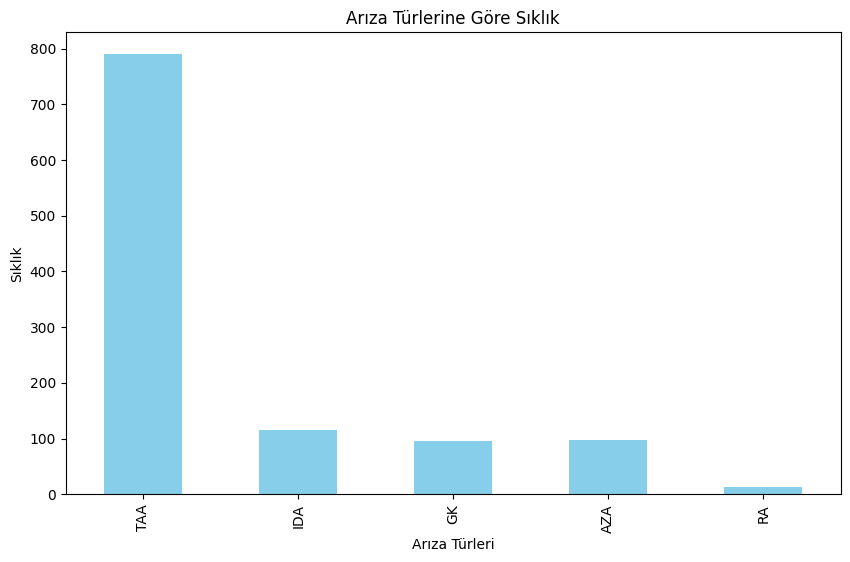

In [31]:
# Arıza Türlerine Göre Sıklık Analizi
failure_counts = df[['TAA', 'IDA', 'GK', 'AZA', 'RA']].sum()
plt.figure(figsize=(10, 6))
failure_counts.plot(kind='bar', color='skyblue')
plt.title('Arıza Türlerine Göre Sıklık')
plt.ylabel('Sıklık')
plt.xlabel('Arıza Türleri')
plt.show()


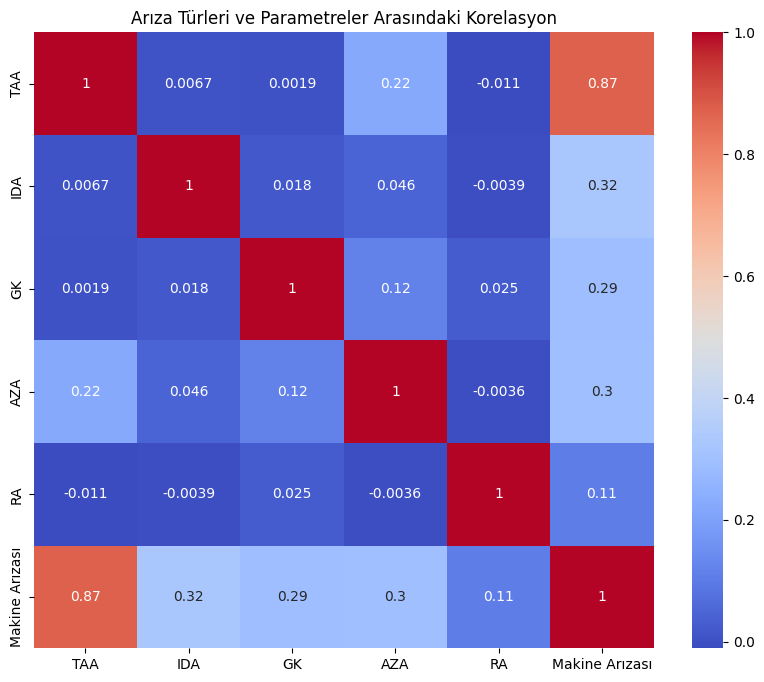

In [32]:
# Korelasyon analizi
correlation_matrix = df[['TAA', 'IDA', 'GK', 'AZA', 'RA', 'Makine Arızası']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Arıza Türleri ve Parametreler Arasındaki Korelasyon")
plt.show()

In [33]:
df.head()

,UDI,Tür,İşlem Sıcaklığı [C],Hava Sıcaklığı [C],Dönme Hızı [rpm],Tork [Nm],Alet Aşınması [dk],Makine Arızası,Takım Aşınma Arızası,Isı Dağılımı Arızası,Güç Kesintisi,Aşırı Gerilim Arızası,Rastgele Arızalar,TAA,IDA,GK,Güç,AZA,RA
0,1,M,35.45,24.95,1551,42.8,0,0,0,0,0,0,0,0,0,0,6951.590560,0,0
1,2,L,35.55,25.05,1408,46.3,3,0,0,0,0,0,0,0,0,0,6826.722724,0,0
2,3,L,35.35,24.95,1498,49.4,5,0,0,0,0,0,0,0,0,0,7749.387543,0,0
3,4,L,35.45,25.05,1433,39.5,7,0,0,0,0,0,0,0,0,0,5927.504659,0,0
4,5,L,35.55,25.05,1408,40.0,9,0,0,0,0,0,0,0,0,0,5897.816608,0,0


In [34]:
# Özellikler ve hedef değişkeni seçme
X = df[['İşlem Sıcaklığı [C]', 'Hava Sıcaklığı [C]', 'Dönme Hızı [rpm]', 'Tork [Nm]', 'Alet Aşınması [dk]', 'Güç']]
y = df['Makine Arızası']

In [35]:
# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Performans sonuçlarını kaydetmek için liste
results = []

In [37]:
# Helper function to append metrics to results
def evaluate_model(model_name, y_test, y_pred, train_time, predict_time):
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    
    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1-Score": f1,
        "MCC score": mcc,
        "Time to Train (s)": round(train_time, 2),
        "Time to Predict (s)": round(predict_time, 2),
        "Total Time (s)": round(train_time + predict_time, 2)
    })

In [38]:
# 1. Logistic Regression
start_time = time.time()
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = log_reg.predict(X_test)
predict_time = time.time() - start_time

evaluate_model("Logistic Regression", y_test, y_pred, train_time, predict_time)

In [39]:
# 2. Decision Tree
start_time = time.time()
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = tree_model.predict(X_test)
predict_time = time.time() - start_time

evaluate_model("Decision Tree", y_test, y_pred, train_time, predict_time)

In [40]:
# 3. Random Forest
start_time = time.time()
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = rf_model.predict(X_test)
predict_time = time.time() - start_time

evaluate_model("Random Forest", y_test, y_pred, train_time, predict_time)

In [41]:
# 4. Gradient Boosting
start_time = time.time()
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = gb_model.predict(X_test)
predict_time = time.time() - start_time

evaluate_model("Gradient Boosting", y_test, y_pred, train_time, predict_time)

In [42]:
# 5. Support Vector Machine (SVM)
start_time = time.time()
svm_model = SVC()
svm_model.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = svm_model.predict(X_test)
predict_time = time.time() - start_time

evaluate_model("Support Vector Machine", y_test, y_pred, train_time, predict_time)

In [43]:
# 6. K-Nearest Neighbors (KNN)
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
train_time = time.time() - start_time

start_time = time.time()
y_pred = knn_model.predict(X_test)
predict_time = time.time() - start_time

evaluate_model("K-Nearest Neighbors", y_test, y_pred, train_time, predict_time)

In [44]:
# 7. LSTM Model (Sequential Data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = np.reshape(X_scaled, (X_scaled.shape[0], 1, X_scaled.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

start_time = time.time()
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)
train_time = time.time() - start_time

start_time = time.time()
y_pred = (model.predict(X_test) > 0.5).astype("int32")
predict_time = time.time() - start_time

evaluate_model("LSTM", y_test, y_pred, train_time, predict_time)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [45]:
# Convert results to DataFrame
df_results = pd.DataFrame(results)

In [46]:
# Set 'Model' as index
df_results.set_index("Model", inplace=True)

In [47]:
# Display styled DataFrame
styled_df = df_results.style.background_gradient(cmap="coolwarm").format({
    "Accuracy": "{:.3%}",
    "Recall": "{:.3%}",
    "Precision": "{:.3%}",
    "F1-Score": "{:.3%}",
    "MCC score": "{:.3%}",
    "Time to Train (s)": "{:.5f}",
    "Time to Predict (s)": "{:.5f}",
    "Total Time (s)": "{:.5f}"
})

styled_df

,Accuracy,Recall,Precision,F1-Score,MCC score,Time to Train (s),Time to Predict (s),Total Time (s)
Model,,,,,,,,
Logistic Regression,92.000%,33.663%,72.340%,45.946%,45.871%,0.08000,0.00000,0.08000
Decision Tree,99.200%,97.030%,95.146%,96.078%,95.639%,0.03000,0.00000,0.03000
Random Forest,99.250%,94.059%,98.446%,96.203%,95.817%,0.88000,0.02000,0.90000
Gradient Boosting,99.350%,94.554%,98.964%,96.709%,96.379%,1.05000,0.01000,1.06000
Support Vector Machine,89.900%,0.000%,0.000%,0.000%,0.000%,0.50000,0.24000,0.74000
K-Nearest Neighbors,93.450%,52.475%,75.177%,61.808%,59.478%,0.01000,0.09000,0.10000
LSTM,97.100%,82.178%,88.298%,85.128%,83.590%,5.78000,0.45000,6.23000


In [48]:
# Veriyi kontrol et (LSTM sonrası 3D olabilir)
if len(X_train.shape) == 3:
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[2])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[2])

In [49]:
# Parametre grid'leri
grid_params = {
    "Basit ve Genel Optimizasyon": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    "Daha Fazla Öğrenme": {
        'n_estimators': [500, 1000, 1500],
        'learning_rate': [0.01, 0.05],
        'max_depth': [7, 10, 15],
        'subsample': [0.7, 0.8],
        'min_samples_split': [10, 20],
        'min_samples_leaf': [4, 8]
    },
    "Hızlı Öğrenme": {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.2, 0.3],
        'max_depth': [2, 3, 4],
        'subsample': [0.8, 1.0],
        'min_samples_split': [5, 10],
        'min_samples_leaf': [1, 2]
    },
    "Denge ve Budama": {
        'n_estimators': [200, 300, 500],
        'learning_rate': [0.05, 0.1],
        'max_depth': [4, 6, 8],
        'subsample': [0.6, 0.8],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [2, 4],
        'ccp_alpha': [0.0, 0.01, 0.1]
    },
    "Daha Yaratıcı ve Geniş Optimizasyon": {
        'n_estimators': [300, 500, 700],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [5, 8, 12],
        'subsample': [0.7, 0.9, 1.0],
        'min_samples_split': [5, 10, 15],
        'min_samples_leaf': [1, 3, 5],
        'max_features': ['sqrt', 'log2', None],
        'loss': ['log_loss', 'exponential']
    }
}

In [50]:
# Model tanımlama
gb_model = GradientBoostingClassifier(random_state=42)

In [51]:
results = []

In [52]:
def evaluate_model(grid_name, y_test, y_pred, train_time, predict_time):
    print(f"\n[INFO] Model: {grid_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Train Time (s): {train_time:.2f}")
    print(f"Predict Time (s): {predict_time:.2f}")

In [53]:
for grid_name, param_grid in grid_params.items():
    print(f"\n[INFO] {grid_name} Hiperparametresi")
    grid_search = GridSearchCV(
        estimator=gb_model,
        param_grid=param_grid,
        scoring='f1',
        cv=5,
        verbose=2,
        n_jobs=-1
    )

    # Eğitim zamanı ölçümü
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    train_time = time.time() - start_time

    # Test performansı ölçümü
    start_time = time.time()
    y_pred = grid_search.best_estimator_.predict(X_test)
    predict_time = time.time() - start_time

    # Toplam süreyi hesapla
    total_time = train_time + predict_time

    # Modeli değerlendirme
    evaluate_model(grid_name, y_test, y_pred, train_time, predict_time)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred),
        "Train Time (s)": train_time,
        "Predict Time (s)": predict_time,
        "Total Time (s)": total_time
    }

    results.append((grid_name, metrics))


[INFO] Basit ve Genel Optimizasyon Hiperparametresi
Fitting 5 folds for each of 216 candidates, totalling 1080 fits



[INFO] Model: Basit ve Genel Optimizasyon
Accuracy: 0.9960
Recall: 0.9653
Precision: 0.9949
F1-Score: 0.9799
Train Time (s): 543.18
Predict Time (s): 0.02

[INFO] Daha Fazla Öğrenme Hiperparametresi
Fitting 5 folds for each of 144 candidates, totalling 720 fits

[INFO] Model: Daha Fazla Öğrenme
Accuracy: 0.9955
Recall: 0.9703
Precision: 0.9849
F1-Score: 0.9776
Train Time (s): 2740.32
Predict Time (s): 0.03

[INFO] Hızlı Öğrenme Hiperparametresi
Fitting 5 folds for each of 144 candidates, totalling 720 fits

[INFO] Model: Hızlı Öğrenme
Accuracy: 0.9925
Recall: 0.9554
Precision: 0.9698
F1-Score: 0.9626
Train Time (s): 207.63
Predict Time (s): 0.00

[INFO] Denge ve Budama Hiperparametresi
Fitting 5 folds for each of 432 candidates, totalling 2160 fits

[INFO] Model: Denge ve Budama
Accuracy: 0.9960
Recall: 0.9703
Precision: 0.9899
F1-Score: 0.9800
Train Time (s): 1476.76
Predict Time (s): 0.02

[INFO] Daha Yaratıcı ve Geniş Optimizasyon Hiperparametresi
Fitting 5 folds for each of 4374 c

In [54]:
# Sonuçları görselleştirme
results_df = pd.DataFrame([{**{"Parametre Seti": name}, **metrics} for name, metrics in results])

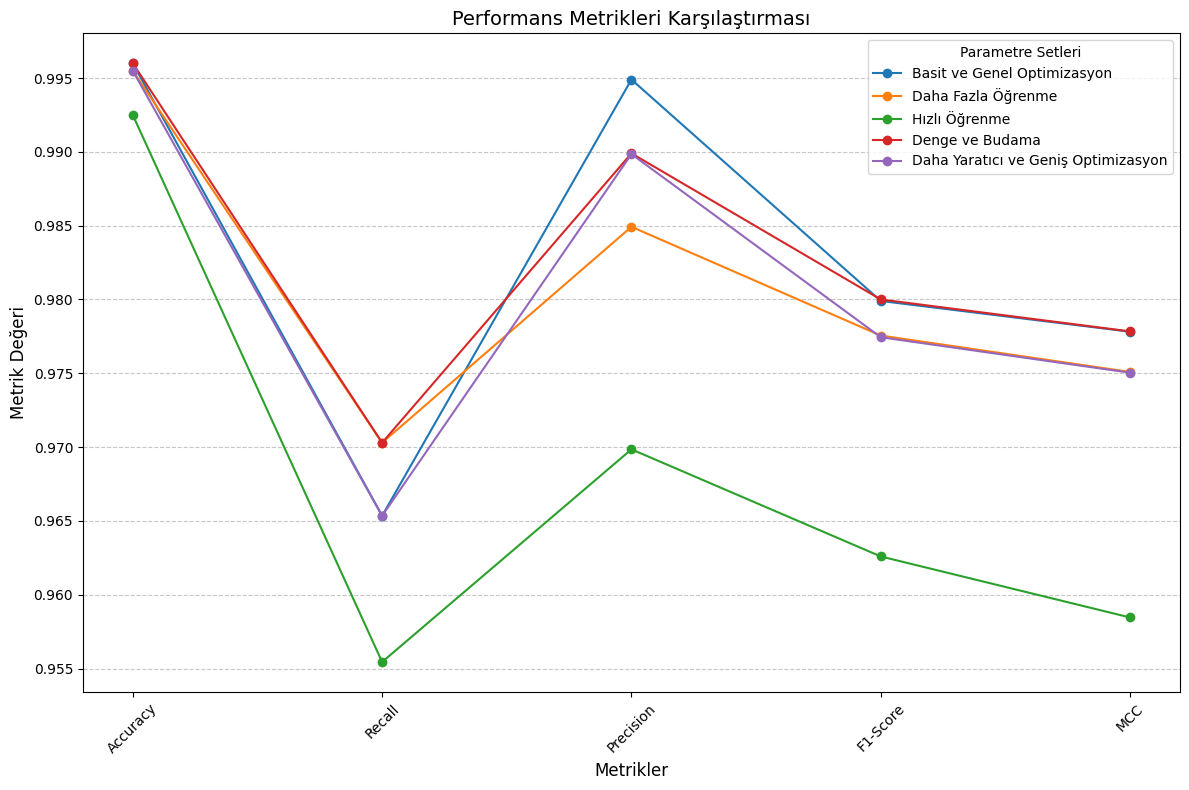

In [55]:
# Performans sonuçları için görselleştirme
metrics_list = ["Accuracy", "Recall", "Precision", "F1-Score", "MCC"]
plt.figure(figsize=(12, 8))

# Çizim
for grid_name, metrics_values in results:
    values = [metrics_values[metric] for metric in metrics_list]
    plt.plot(metrics_list, values, label=grid_name, marker="o")

# Başlık ve etiketler
plt.title("Performans Metrikleri Karşılaştırması", fontsize=14)
plt.xlabel("Metrikler", fontsize=12)
plt.ylabel("Metrik Değeri", fontsize=12)

# Grid ve diğer ayarlar
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Parametre Setleri", fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Gösterim
plt.show()

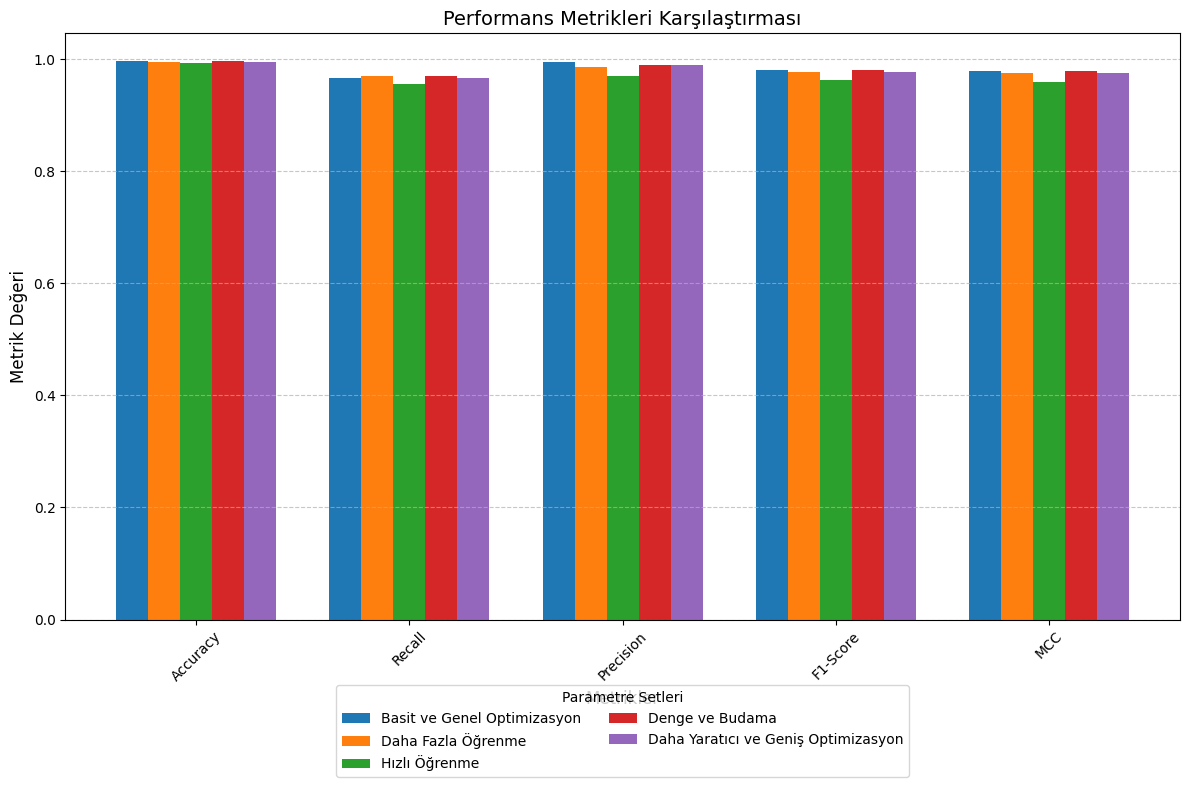

In [56]:
# Performans sonuçları için görselleştirme
metrics_list = ["Accuracy", "Recall", "Precision", "F1-Score", "MCC"]
plt.figure(figsize=(12, 8))

# Çubuk grafik çizimi
width = 0.15  # Çubukların genişliği
x = range(len(metrics_list))  # X ekseni için konumlar

for i, (name, metrics_values) in enumerate(results):
    plt.bar(
        [pos + i * width for pos in x],  # Çubukların x pozisyonları
        [metrics_values[metric] for metric in metrics_list],  # Çubukların yüksekliği
        width=width,  # Çubuk genişliği
        label=name,  # Etiket
    )

# Başlık ve etiketler
plt.title("Performans Metrikleri Karşılaştırması", fontsize=14)
plt.xlabel("Metrikler", fontsize=12)
plt.ylabel("Metrik Değeri", fontsize=12)
plt.xticks([pos + (len(results) - 1) * width / 2 for pos in x], metrics_list, rotation=45)  # X ekseni etiketleri

# Legend'in konumunu ayarlayın
plt.legend(
    title="Parametre Setleri", 
    fontsize=10, 
    loc="upper center", 
    bbox_to_anchor=(0.5, -0.1), 
    ncol=2
)

# Grid ve düzen ayarları
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()

# Gösterim
plt.show()


In [57]:
# Sonuçları saklamak için liste
results = []

In [58]:
# Her model ve hiperparametre seti için sonuçları kaydetme
for model_name, metrics in results:
    results.append({
        "Model ve Hiperparametre": model_name,
        "Accuracy": metrics["Accuracy"],
        "Recall": metrics["Recall"],
        "Precision": metrics["Precision"],
        "F1-Score": metrics["F1-Score"],
        "MCC": metrics["MCC"],
        "Train Time (s)": metrics["Train Time (s)"],
        "Predict Time (s)": metrics["Predict Time (s)"],
        "Total Time (s)": metrics["Total Time (s)"]
    })

In [59]:
# Stilize edilmiş tablo
styled_df = results_df.style.background_gradient(cmap="coolwarm").format({
    "Accuracy": "{:.3f}",
    "Recall": "{:.3f}",
    "Precision": "{:.3f}",
    "F1-Score": "{:.3f}",
    "MCC": "{:.3f}",
    "Train Time (s)": "{:.5f}",
    "Predict Time (s)": "{:.5f}",
    "Total Time (s)": "{:.5f}"
}).set_properties(**{"text-align": "center"})

# Tabloyu göster
styled_df

,Parametre Seti,Accuracy,Recall,Precision,F1-Score,MCC,Train Time (s),Predict Time (s),Total Time (s)
0,Basit ve Genel Optimizasyon,0.996,0.965,0.995,0.980,0.978,543.17799,0.01834,543.19632
1,Daha Fazla Öğrenme,0.996,0.970,0.985,0.978,0.975,2740.32483,0.03268,2740.35751
2,Hızlı Öğrenme,0.993,0.955,0.970,0.963,0.958,207.63272,0.00438,207.63709
3,Denge ve Budama,0.996,0.970,0.990,0.980,0.978,1476.75766,0.01662,1476.77428
4,Daha Yaratıcı ve Geniş Optimizasyon,0.996,0.965,0.990,0.977,0.975,30084.74017,0.03492,30084.77509


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


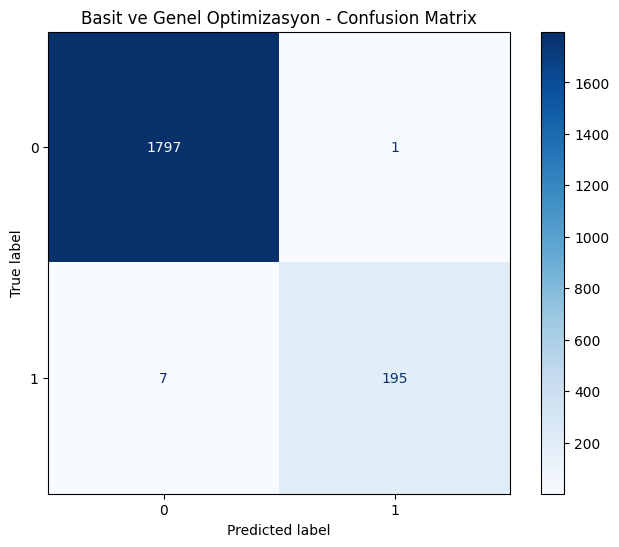

Fitting 5 folds for each of 144 candidates, totalling 720 fits


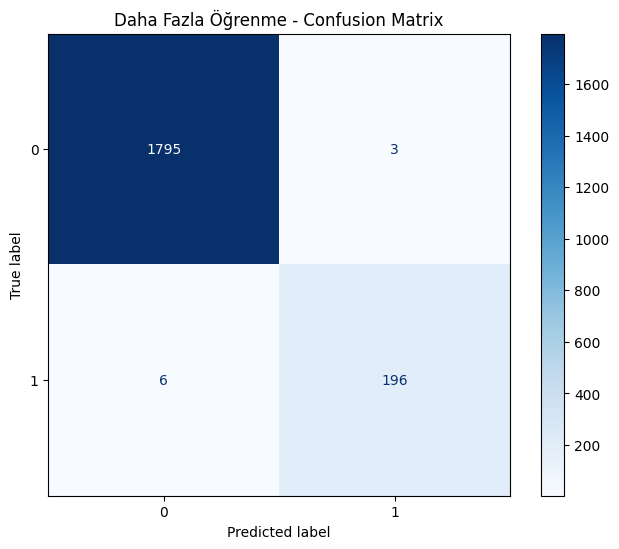

Fitting 5 folds for each of 144 candidates, totalling 720 fits


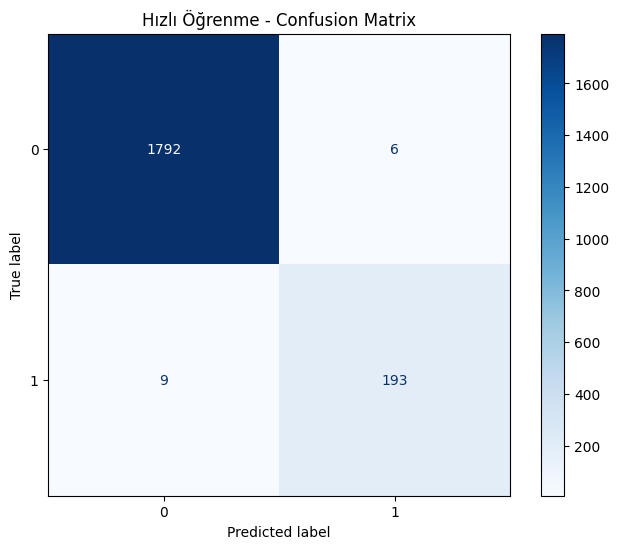

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


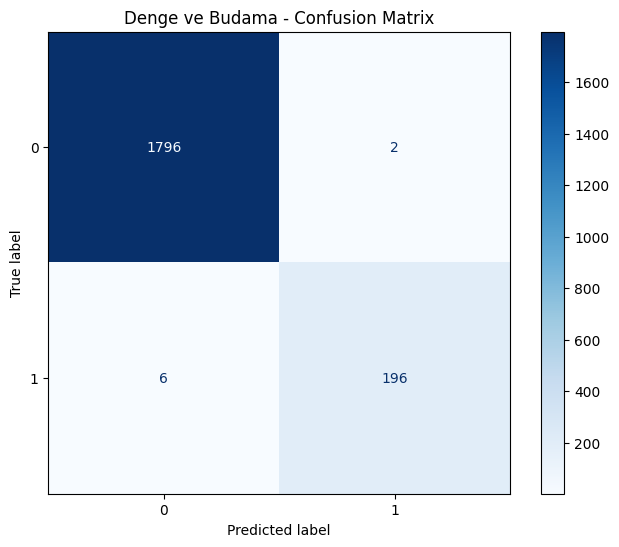

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits


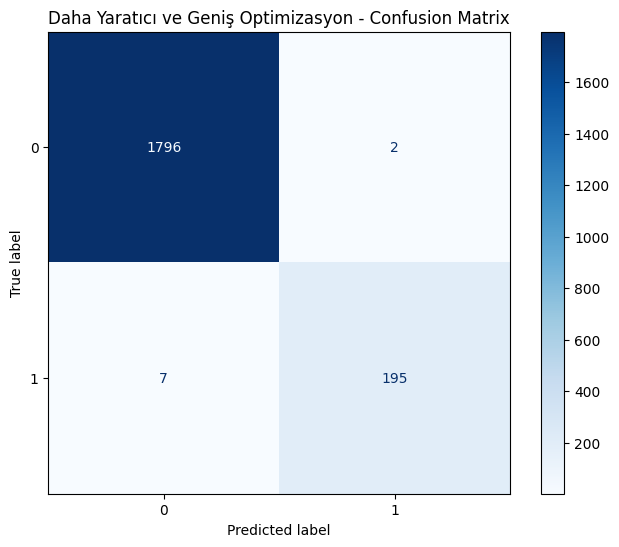

In [60]:
# Konfüzyon matrisi gösterimi
for grid_name, param_grid in grid_params.items():
    grid_search = GridSearchCV(
        estimator=gb_model,
        param_grid=param_grid,
        scoring='f1',
        cv=5,
        verbose=2,
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
    
    plt.figure(figsize=(8, 6))
    disp.plot(cmap="Blues", values_format='d', ax=plt.gca())
    plt.title(f"{grid_name} - Confusion Matrix")
    plt.grid(False)
    plt.show()